In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')

> # 🏦 Credit Risk Analysis

> ## 💰 What is Credit Risk Analysis

> #### Credit Risk Analysis is the process of evaluating the likelihood that a borrower will default on their debt obligations. It involves assessing the potential risk that a lender faces when lending money or extending credit to an individual, business, or organization. The goal is to understand how likely the borrower is to repay the loan, as well as the potential impact on the lender if the borrower fails to meet the repayment terms.

> ## 📈Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


> ## 🛢️Overview of the Data

> #### To understand the structure of the dataset, including the number of rows, columns, and data types

> ## ⏳ Data Loading

In [3]:
from scripts.data_loader import dataLoading
data=dataLoading()

> ## ✅ Check Loaded Dataset

In [4]:
data.head(10)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

> ## 📊 Summary Statistics

> #### To understand the central tendency, dispersion, and shape of the dataset’s distribution.

In [6]:
data.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


> ## 🔧 Distribution of Numerical Features

> #### Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.

In [7]:
# Identify numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


> ### Count the value of each columns


In [8]:
for col in numerical_columns:
    if col=='Amount' or col=='Value':
        continue
    else:
        print(f'Value count of {data[col].value_counts()}\n And')
        print(f'{data[col].nunique()} Unique Value\n\n')

Value count of CountryCode
256    95662
Name: count, dtype: int64
 And
1 Unique Value


Value count of PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64
 And
4 Unique Value


Value count of FraudResult
0    95469
1      193
Name: count, dtype: int64
 And
2 Unique Value




> ### Count the value of Amount and Value columns

In [9]:
print(data['Amount'].value_counts())


Amount
 1000.00      17091
-50.00         8513
 10000.00      8260
 2000.00       5489
 500.00        5246
              ...  
-5.98             1
 101500.00        1
 101350.00        1
 9585.00          1
 5890.00          1
Name: count, Length: 1676, dtype: int64


In [10]:
print(data['Amount'].value_counts())


Amount
 1000.00      17091
-50.00         8513
 10000.00      8260
 2000.00       5489
 500.00        5246
              ...  
-5.98             1
 101500.00        1
 101350.00        1
 9585.00          1
 5890.00          1
Name: count, Length: 1676, dtype: int64


> ### Check the Skewness value of numerical columns

In [11]:

from scripts.data_cleaning import display_skewness
display_skewness(data)

CountryCode
Skewness: 0.0
Kurtosis: 0.0
Amount
Skewness: 51.098489522819115
Kurtosis: 3363.1277386950474
Value
Skewness: 51.29108598736249
Kurtosis: 3378.069273754232
PricingStrategy
Skewness: 1.6590573072757961
Kurtosis: 2.087533632908269
FraudResult
Skewness: 22.196294806589147
Kurtosis: 490.6857618799325


{'CountryCode': {'Skewness': 0.0, 'Kurtosis': 0.0},
 'Amount': {'Skewness': 51.098489522819115, 'Kurtosis': 3363.1277386950474},
 'Value': {'Skewness': 51.29108598736249, 'Kurtosis': 3378.069273754232},
 'PricingStrategy': {'Skewness': 1.6590573072757961,
  'Kurtosis': 2.087533632908269},
 'FraudResult': {'Skewness': 22.196294806589147,
  'Kurtosis': 490.6857618799325}}

> ### Amount, Value and Fraud Result columns have high skew value

In [12]:
print(data[data['FraudResult']==0].shape[0])
print(data[data['FraudResult']==1].shape[0])

95469
193


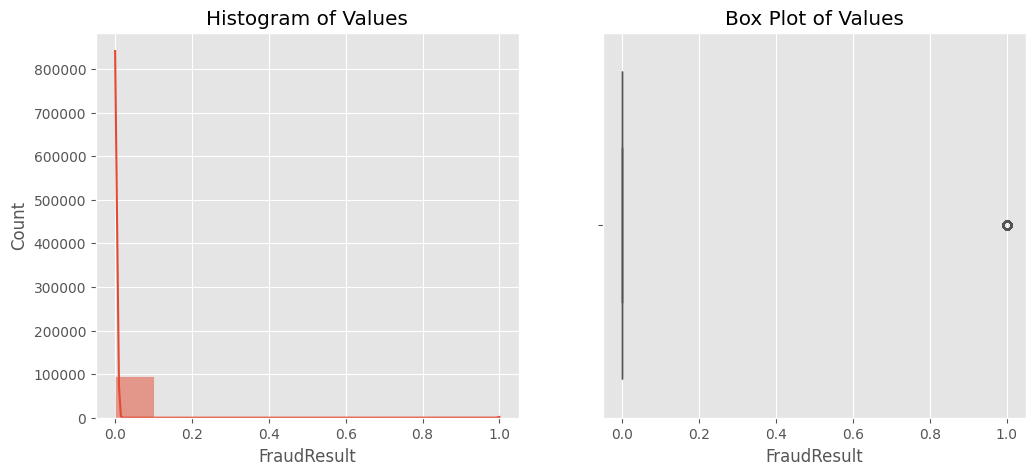

In [13]:
from scripts.visualize import plot_fraud_result
plot_fraud_result(data)

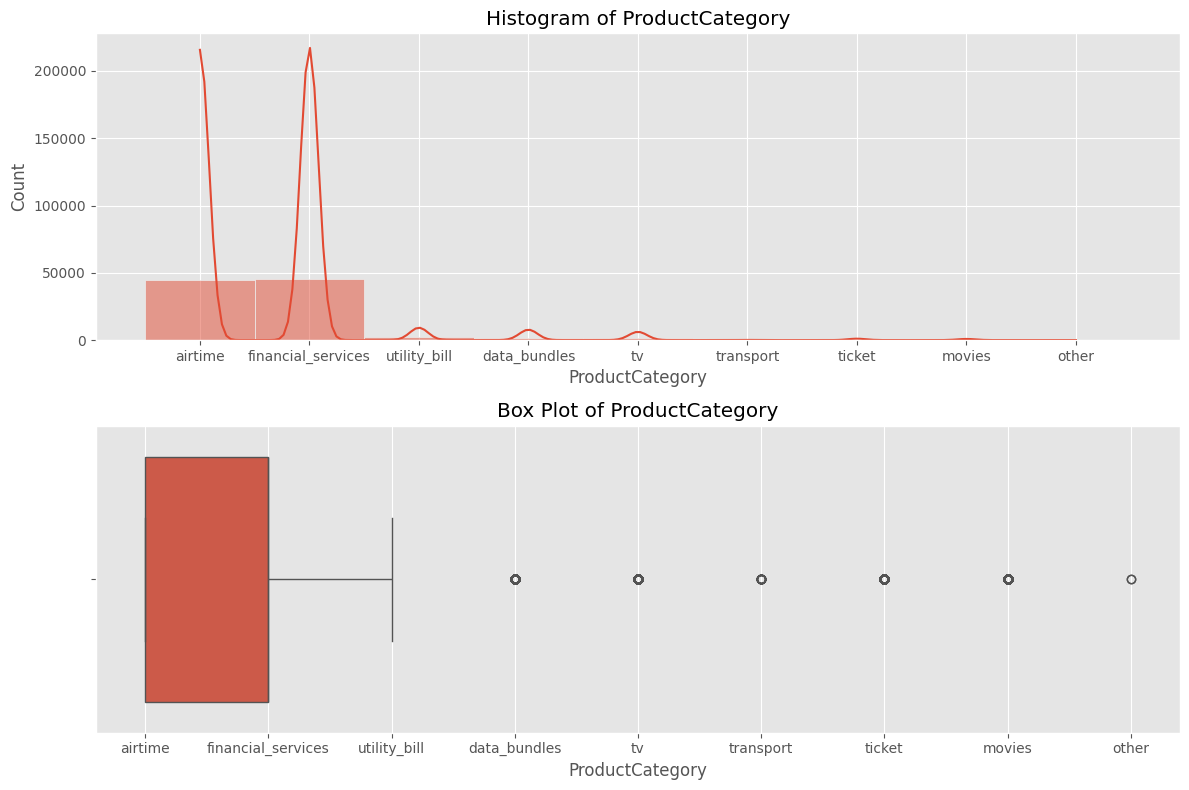

In [14]:
from scripts.visualize import plot_product_category
plot_product_category(data)

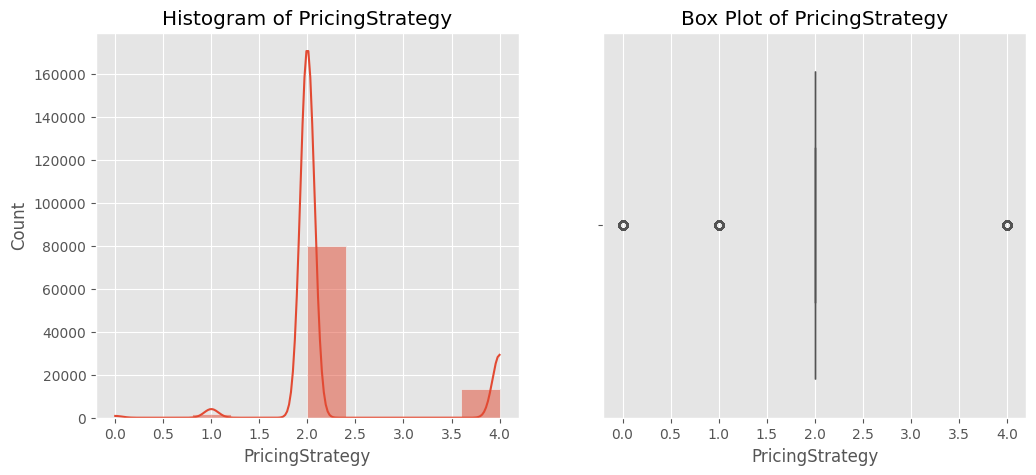

In [15]:
from scripts.visualize import pricing_strategy
pricing_strategy(data)

> ## 📈Visualize the distribution of numerical features


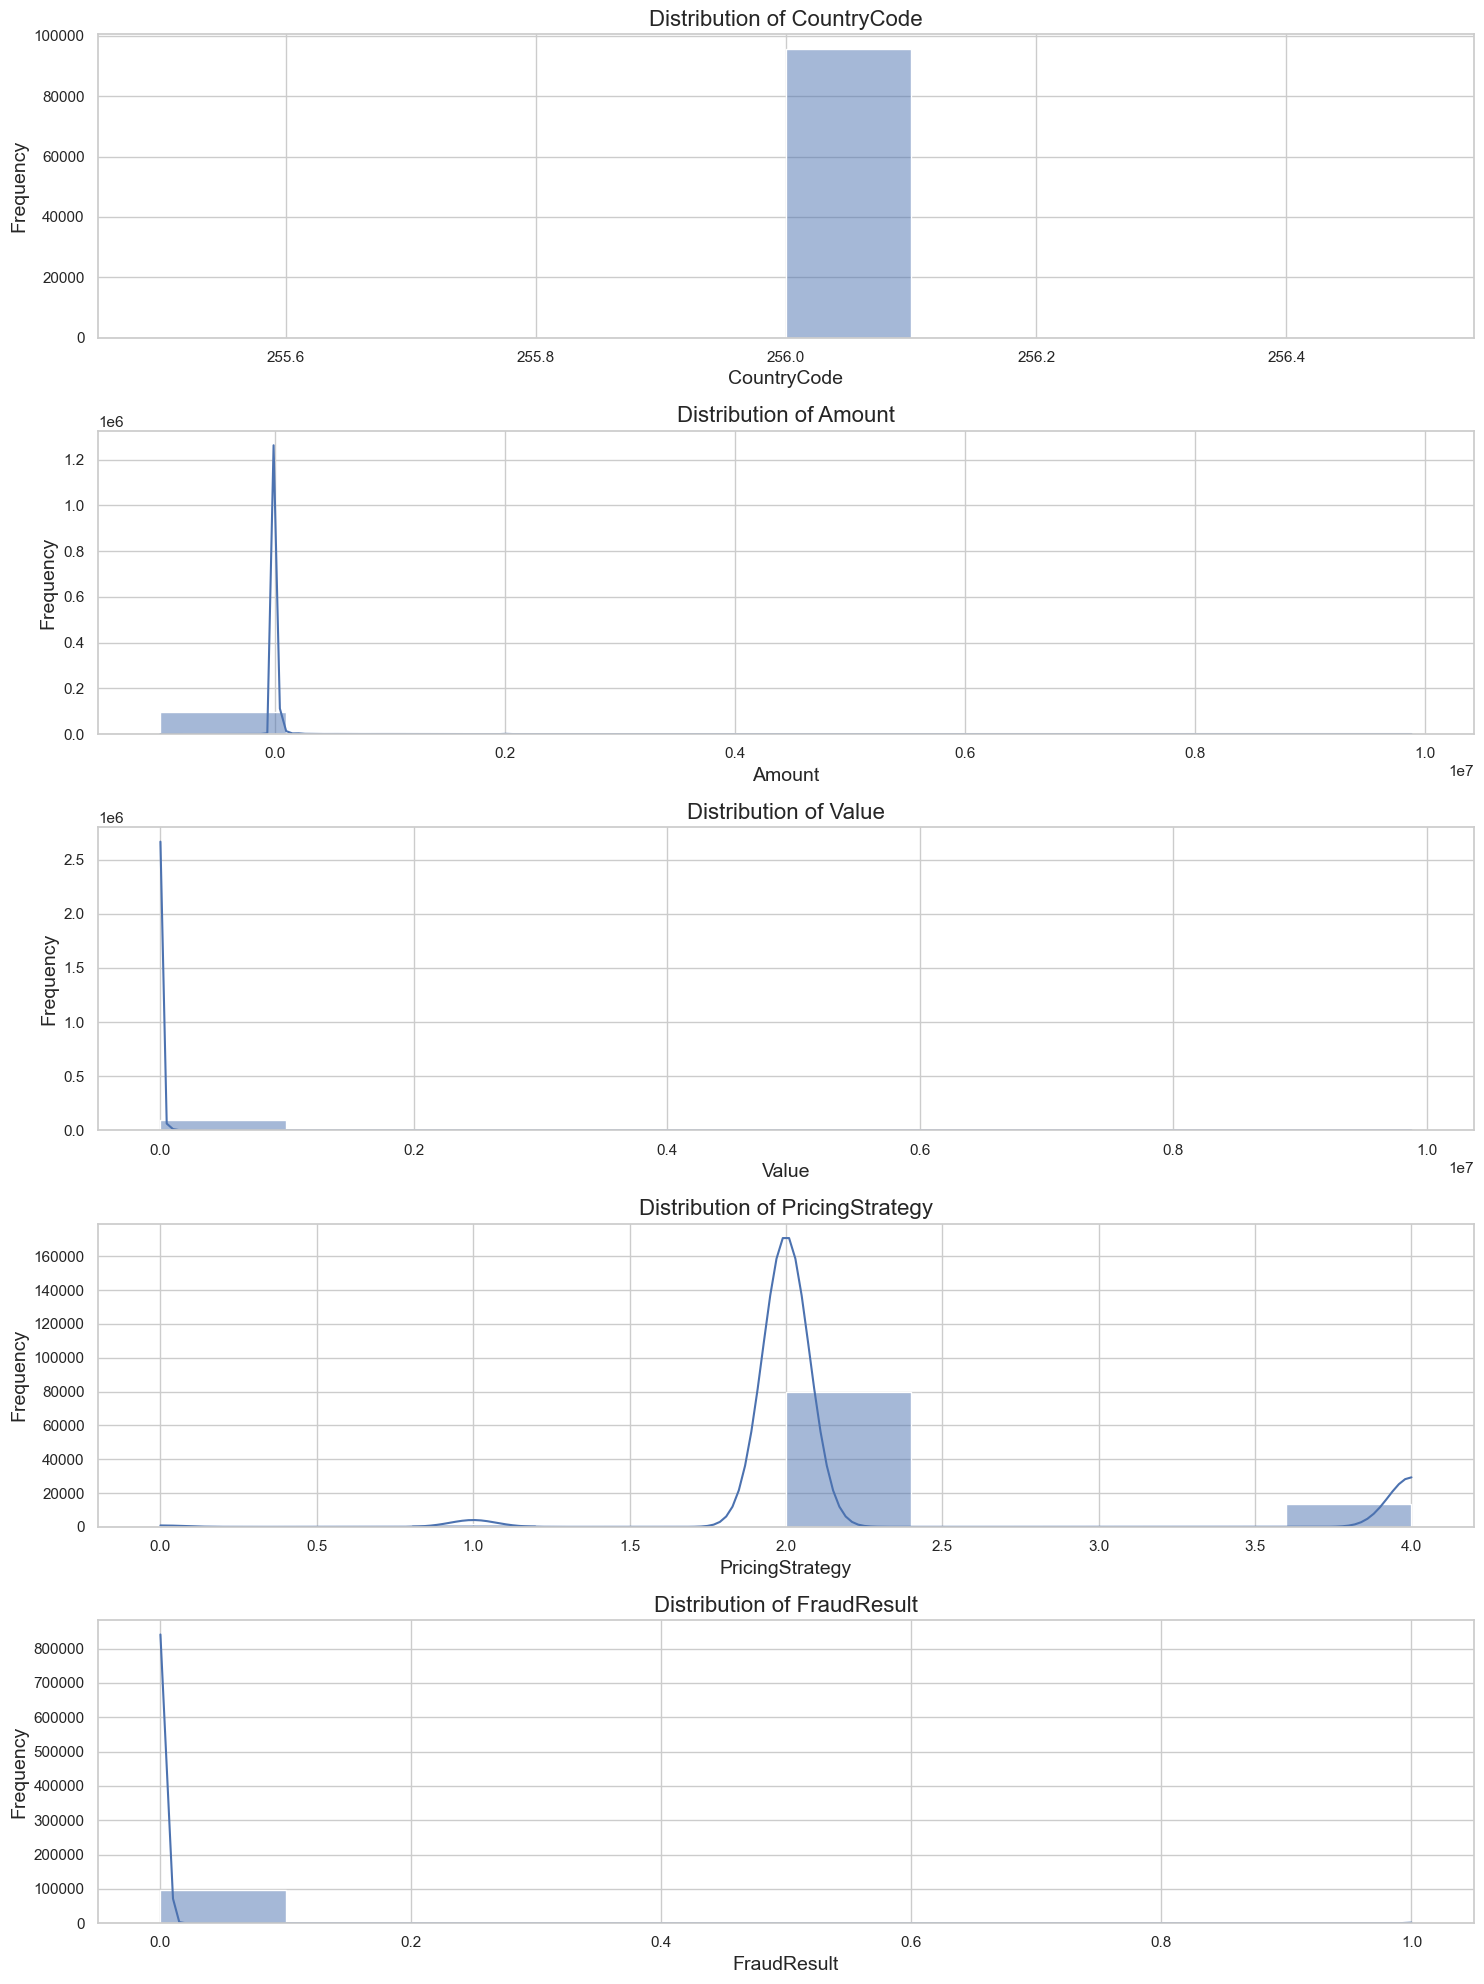

In [16]:
from scripts.visualize import visualize_numerical_features
visualize_numerical_features(data)

> ## 📈Distribution of Categorical Features

> ### Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.


In [17]:
data.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [18]:
data[['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId']]

,CurrencyCode,CountryCode,ProviderId,ProductId
0,UGX,256,ProviderId_6,ProductId_10
1,UGX,256,ProviderId_4,ProductId_6
2,UGX,256,ProviderId_6,ProductId_1
3,UGX,256,ProviderId_1,ProductId_21
4,UGX,256,ProviderId_4,ProductId_6
...,...,...,...,...
95657,UGX,256,ProviderId_4,ProductId_6
95658,UGX,256,ProviderId_6,ProductId_10
95659,UGX,256,ProviderId_4,ProductId_6
95660,UGX,256,ProviderId_6,ProductId_19


Distribution of many values column

In [19]:
print(data['AccountId'].value_counts())


AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
                  ...  
AccountId_4180        1
AccountId_63          1
AccountId_3497        1
AccountId_2010        1
AccountId_1685        1
Name: count, Length: 3633, dtype: int64


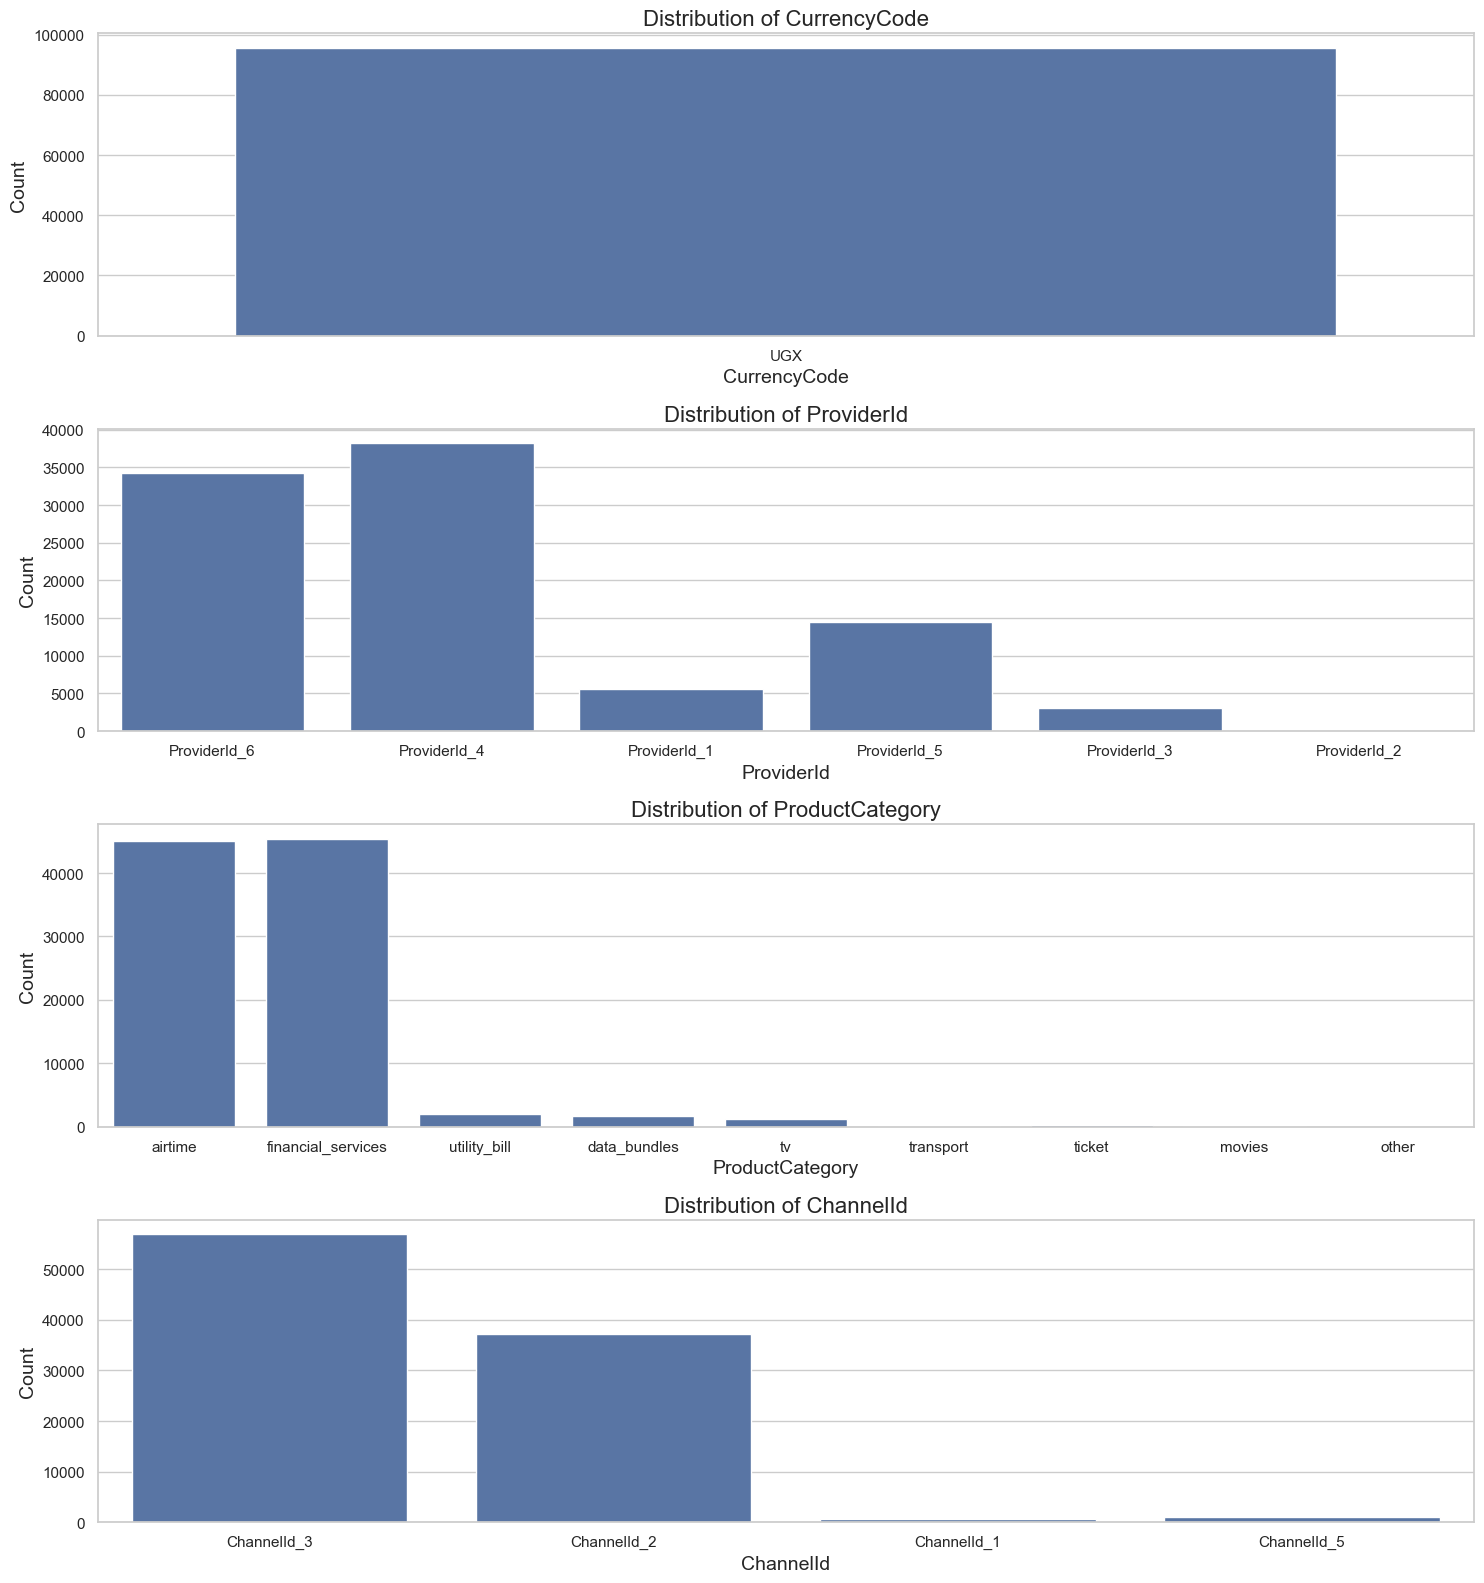

In [20]:
from scripts.visualize import visualize_categorical_features
data1 = data[[ 'CurrencyCode', 'CountryCode', 'ProviderId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'PricingStrategy', 'FraudResult']]
visualize_categorical_features(data1)

In [21]:
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols]

,CountryCode,Amount,Value,PricingStrategy,FraudResult
0,256,1000.0,1000,2,0
1,256,-20.0,20,2,0
2,256,500.0,500,2,0
3,256,20000.0,21800,2,0
4,256,-644.0,644,2,0
...,...,...,...,...,...
95657,256,-1000.0,1000,2,0
95658,256,1000.0,1000,2,0
95659,256,-20.0,20,2,0
95660,256,3000.0,3000,2,0


> ## 🔗Correlation Analysis

> ### To Understanding the relationship between numerical features.


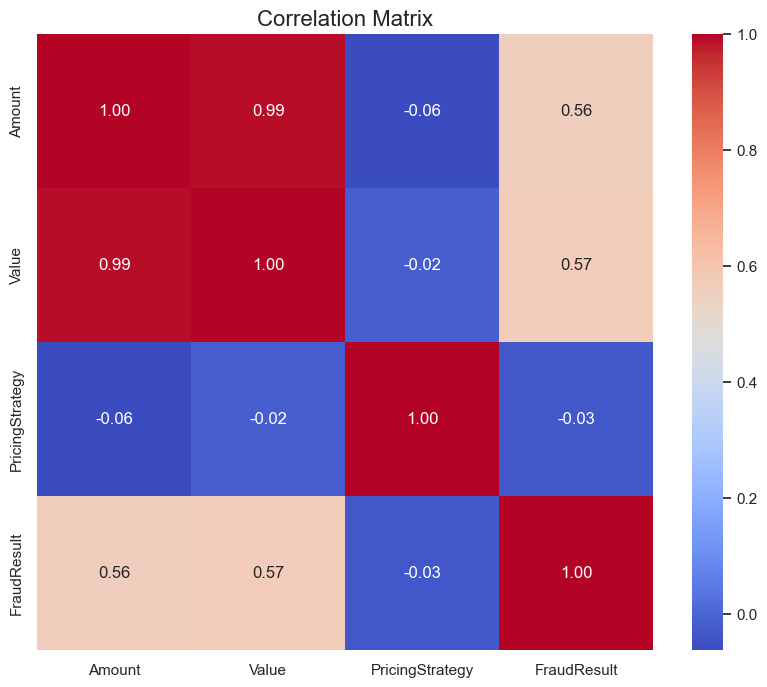

In [22]:
from scripts.visualize import correlation_analysis
correlation_analysis(data)

> ## ⚠️Identifying Missing Values

> ### Identify missing values to determine missing data and decide on appropriate imputation strategies.

In [23]:
from scripts.data_cleaning import find_missing_values
find_missing_values(data)

From 16 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


> ### The Datasets have no missing values

> ## ☄ Outlier Detection

> ### Using box plots to identify outliers.

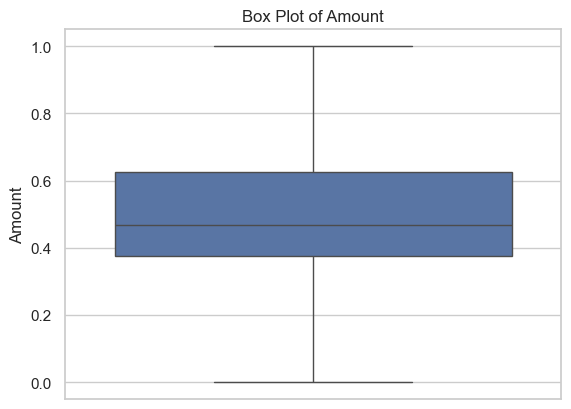

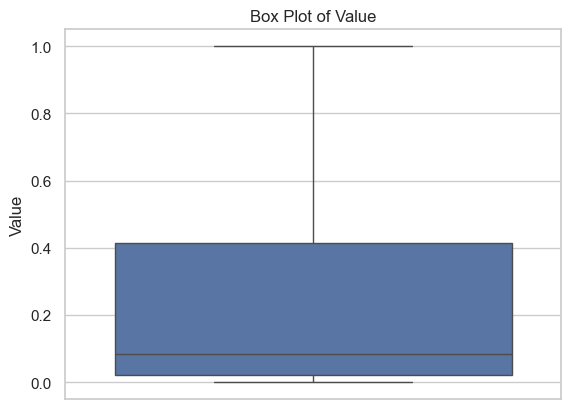

In [69]:
from scripts.data_cleaning import boxPlotForDetectOutliers
boxPlotForDetectOutliers(data,['Amount','Value'])

> ### From Numerical Columns Amount and Value have Outliers

> ## ☄ Remove outliers

In [25]:
from scripts.data_cleaning import remove_outliers_winsorization
data=remove_outliers_winsorization(data, ['Amount','Value'])

In [26]:
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,7075.0,12087.5,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2,0


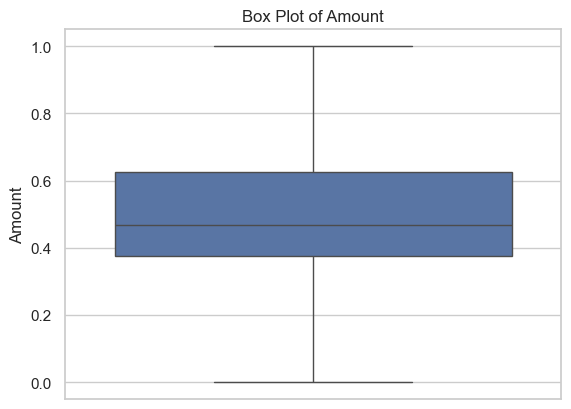

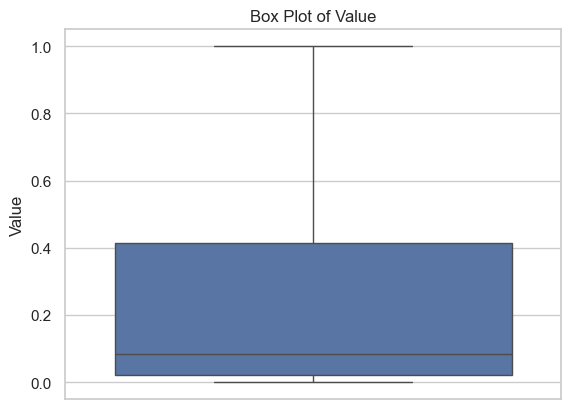

In [70]:
boxPlotForDetectOutliers(data,['Amount','Value'])

> # ✨ Feature Engineering

In [28]:
data.sample(1)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
49997,TransactionId_70340,BatchId_46407,AccountId_4098,SubscriptionId_3901,CustomerId_4548,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,2019-01-03T19:38:45Z,2,0


> ## ❇ Create Aggregate Features

In [29]:
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,7075.0,12087.5,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2,0


In [30]:
data.shape

(95662, 16)

In [31]:
from scripts.feature_engineering import aggregate_features
data['CustomerId'] = data['CustomerId'].astype(str)

aggregated = aggregate_features(data, 'CustomerId')

aggregated['CustomerId'] = aggregated['CustomerId'].astype(str)

data = pd.merge(data, aggregated, on='CustomerId', how='left')

nan_average = data[data['Average_Transaction_Amount'].isna()].head()
print(nan_average)

Empty DataFrame
Columns: [TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, CurrencyCode, CountryCode, ProviderId, ProductId, ProductCategory, ChannelId, Amount, Value, TransactionStartTime, PricingStrategy, FraudResult, Total_Transaction_Amount, Average_Transaction_Amount, Transaction_Count, Std_Deviation_Transaction_Amount]
Index: []


In [32]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount
count,95662.0,95662.000000,95662.000000,95662.000000,95662.000000,9.566200e+04,95662.000000,95662.000000,94950.000000
mean,256.0,1449.051201,3403.667282,2.255974,0.002018,-4.917855e+05,1449.051201,392.982982,2511.949445
std,0.0,3210.808287,4168.243292,0.732924,0.044872,3.654092e+06,1609.298352,878.631072,1356.843160
min,256.0,-4325.000000,2.000000,0.000000,0.000000,-1.769358e+07,-4325.000000,1.000000,0.000000
25%,256.0,-50.000000,275.000000,2.000000,0.000000,4.262000e+04,983.474262,32.000000,1624.491760
50%,256.0,1000.000000,1000.000000,2.000000,0.000000,1.255160e+05,1361.576336,93.000000,2232.461211
75%,256.0,2800.000000,5000.000000,2.000000,0.000000,3.296660e+05,2151.644415,273.000000,3334.705301
max,256.0,7075.000000,12087.500000,4.000000,1.000000,1.869489e+06,7075.000000,4091.000000,8061.017306


> ## 🗓️ 🕒Extract Date and Time Features

In [33]:
from scripts.feature_engineering import time_correction
time_correction(data)
data[['TransactionStartTime', 'Transaction_Hour', 'Transaction_Day', 'Transaction_Month', 'Transaction_Year']].head()

,TransactionStartTime,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,2018-11-15 02:18:49+00:00,2,15,11,2018
1,2018-11-15 02:19:08+00:00,2,15,11,2018
2,2018-11-15 02:44:21+00:00,2,15,11,2018
3,2018-11-15 03:32:55+00:00,3,15,11,2018
4,2018-11-15 03:34:21+00:00,3,15,11,2018


In [34]:

def time_correction(data):
    data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

    # Extract features from the TransactionStartTime
    data['Transaction_Hour'] = data['TransactionStartTime'].dt.hour
    data['Transaction_Day'] = data['TransactionStartTime'].dt.day
    data['Transaction_Month'] = data['TransactionStartTime'].dt.month
    data['Transaction_Year'] = data['TransactionStartTime'].dt.year
    return data

> ## 🚀 Encoding Categorical Variables

> #### using One-Hot Encoding for categorical features

In [35]:
from scripts.feature_engineering import one_hot_encoder
data = one_hot_encoder(data)

Shape of encoded features: (95662, 38)


In [36]:
pd.set_option('display.max_columns',None)
data.head()

,TransactionStartTime,TransactionId,AccountId,CustomerId,BatchId,SubscriptionId,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,2018-11-15 02:18:49+00:00,TransactionId_76871,AccountId_3957,CustomerId_4406,BatchId_36123,SubscriptionId_887,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,256,1000.0,1000.0,2,0,93196.75,783.165966,119,2234.368623,2,15,11,2018
1,2018-11-15 02:19:08+00:00,TransactionId_73770,AccountId_4841,CustomerId_4406,BatchId_15642,SubscriptionId_3829,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,256,-20.0,20.0,2,0,93196.75,783.165966,119,2234.368623,2,15,11,2018
2,2018-11-15 02:44:21+00:00,TransactionId_26203,AccountId_4229,CustomerId_4683,BatchId_53941,SubscriptionId_222,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,256,500.0,500.0,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,2018-11-15 03:32:55+00:00,TransactionId_380,AccountId_648,CustomerId_988,BatchId_102363,SubscriptionId_2185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,256,7075.0,12087.5,2,0,86352.20,2272.426316,38,3479.821778,3,15,11,2018
4,2018-11-15 03:34:21+00:00,TransactionId_28195,AccountId_4841,CustomerId_988,BatchId_38780,SubscriptionId_3829,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,256,-644.0,644.0,2,0,86352.20,2272.426316,38,3479.821778,3,15,11,2018


> ## ⚠️  Handling Missing Values

> ### The given datasets have no any missing values

In [37]:
from scripts.feature_engineering import null_value_imputing_KNN
print(data.isnull().sum())

data[data.select_dtypes(include=[np.number]).columns] = null_value_imputing_KNN(data)

TransactionStartTime                    0
TransactionId                           0
AccountId                               0
CustomerId                              0
BatchId                                 0
SubscriptionId                          0
ProviderId_ProviderId_2                 0
ProviderId_ProviderId_3                 0
ProviderId_ProviderId_4                 0
ProviderId_ProviderId_5                 0
ProviderId_ProviderId_6                 0
ProductId_ProductId_10                  0
ProductId_ProductId_11                  0
ProductId_ProductId_12                  0
ProductId_ProductId_13                  0
ProductId_ProductId_14                  0
ProductId_ProductId_15                  0
ProductId_ProductId_16                  0
ProductId_ProductId_19                  0
ProductId_ProductId_2                   0
ProductId_ProductId_20                  0
ProductId_ProductId_21                  0
ProductId_ProductId_22                  0
ProductId_ProductId_23            

In [38]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [39]:
numerical_columns

Index(['ProviderId_ProviderId_2', 'ProviderId_ProviderId_3',
       'ProviderId_ProviderId_4', 'ProviderId_ProviderId_5',
       'ProviderId_ProviderId_6', 'ProductId_ProductId_10',
       'ProductId_ProductId_11', 'ProductId_ProductId_12',
       'ProductId_ProductId_13', 'ProductId_ProductId_14',
       'ProductId_ProductId_15', 'ProductId_ProductId_16',
       'ProductId_ProductId_19', 'ProductId_ProductId_2',
       'ProductId_ProductId_20', 'ProductId_ProductId_21',
       'ProductId_ProductId_22', 'ProductId_ProductId_23',
       'ProductId_ProductId_24', 'ProductId_ProductId_27',
       'ProductId_ProductId_3', 'ProductId_ProductId_4',
       'ProductId_ProductId_5', 'ProductId_ProductId_6',
       'ProductId_ProductId_7', 'ProductId_ProductId_8',
       'ProductId_ProductId_9', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_other', 'ProductCategory_ticket',
       'ProductCategory_transport', 'Produ

In [40]:
data.describe()

,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
count,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.0,95662.000000,95662.000000,95662.000000,95662.000000,9.566200e+04,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000
mean,0.000188,0.032239,0.399208,0.152014,0.357362,0.160816,0.014394,0.000021,0.003094,0.008248,0.125065,0.000105,0.010088,0.002467,0.002258,0.015806,0.001171,0.000010,0.001829,0.000324,0.254479,0.025120,0.000261,0.341149,0.000899,0.002059,0.000178,0.016861,0.474640,0.001829,0.000021,0.002258,0.000261,0.013370,0.020071,0.388252,0.595168,0.010955,256.0,1449.051201,3403.667282,2.255974,0.002018,-4.917855e+05,1449.051201,392.982982,2508.322778,12.447722,15.902898,6.566233,2018.497115
std,0.013716,0.176634,0.489738,0.359037,0.479225,0.367363,0.119111,0.004572,0.055540,0.090443,0.330795,0.010224,0.099930,0.049608,0.047464,0.124724,0.034197,0.003233,0.042732,0.017999,0.435570,0.156489,0.016164,0.474098,0.029970,0.045333,0.013330,0.128753,0.499359,0.042732,0.004572,0.047464,0.016164,0.114854,0.140243,0.487355,0.490862,0.104093,0.0,3210.808287,4168.243292,0.732924,0.044872,3.654092e+06,1609.298352,878.631072,1359.310231,4.846964,8.962822,5.224310,0.499994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,256.0,-4325.000000,2.000000,0.000000,0.000000,-1.769358e+07,-4325.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2018.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,256.0,-50.000000,275.000000,2.000000,0.000000,4.262000e+04,983.474262,32.000000,1618.372867,8.000000,8.000000,1.000000,2018.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [41]:
data.head(10)

,TransactionStartTime,TransactionId,AccountId,CustomerId,BatchId,SubscriptionId,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,2018-11-15 02:18:49+00:00,TransactionId_76871,AccountId_3957,CustomerId_4406,BatchId_36123,SubscriptionId_887,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,256.0,1000.0,1000.0,2.0,0.0,93196.75,783.165966,119.0,2234.368623,2.0,15.0,11.0,2018.0
1,2018-11-15 02:19:08+00:00,TransactionId_73770,AccountId_4841,CustomerId_4406,BatchId_15642,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,256.0,-20.0,20.0,2.0,0.0,93196.75,783.165966,119.0,2234.368623,2.0,15.0,11.0,2018.0
2,2018-11-15 02:44:21+00:00,TransactionId_26203,AccountId_4229,CustomerId_4683,BatchId_53941,SubscriptionId_222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,256.0,500.0,500.0,2.0,0.0,1000.00,500.000000,2.0,0.000000,2.0,15.0,11.0,2018.0
3,2018-11-15 03:32:55+00:00,TransactionId_380,AccountId_648,CustomerId_988,BatchId_102363,SubscriptionId_2185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,256.0,7075.0,12087.5,2.0,0.0,86352.20,2272.426316,38.0,3479.821778,3.0,15.0,11.0,2018.0
4,2018-11-15 03:34:21+00:00,TransactionId_28195,AccountId_4841,CustomerId_988,BatchId_38780,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,256.0,-644.0,644.0,2.0,0.0,86352.20,2272.426316,38.0,3479.821778,3.0,15.0,11.0,2018.0
5,2018-11-15 03:35:10+00:00,TransactionId_23223,AccountId_1078,CustomerId_1432,BatchId_25954,SubscriptionId_4238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,256.0,2000.0,2000.0,2.0,0.0,2000.00,2000.000000,1.0,1052.174890,3.0,15.0,11.0,2018.0
6,2018-11-15 03:44:31+00:00,TransactionId_118063,AccountId_2442,CustomerId_2858,BatchId_118460,SubscriptionId_1980,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,256.0,7075.0,10000.0,4.0,0.0,67875.00,2340.517241,29.0,3627.981617,3.0,15.0,11.0,2018.0
7,2018-11-15 03:45:13+00:00,TransactionId_100640,AccountId_4841,CustomerId_2858,BatchId_38561,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,256.0,-500.0,500.0,2.0,0.0,67875.00,2340.517241,29.0,3627.981617,3.0,15.0,11.0,2018.0
8,2018

In [42]:
data.head(20)

,TransactionStartTime,TransactionId,AccountId,CustomerId,BatchId,SubscriptionId,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,2018-11-15 02:18:49+00:00,TransactionId_76871,AccountId_3957,CustomerId_4406,BatchId_36123,SubscriptionId_887,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,256.0,1000.0,1000.0,2.0,0.0,93196.75,783.165966,119.0,2234.368623,2.0,15.0,11.0,2018.0
1,2018-11-15 02:19:08+00:00,TransactionId_73770,AccountId_4841,CustomerId_4406,BatchId_15642,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,256.0,-20.0,20.0,2.0,0.0,93196.75,783.165966,119.0,2234.368623,2.0,15.0,11.0,2018.0
2,2018-11-15 02:44:21+00:00,TransactionId_26203,AccountId_4229,CustomerId_4683,BatchId_53941,SubscriptionId_222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,256.0,500.0,500.0,2.0,0.0,1000.00,500.000000,2.0,0.000000,2.0,15.0,11.0,2018.0
3,2018-11-15 03:32:55+00:00,TransactionId_380,AccountId_648,CustomerId_988,BatchId_102363,SubscriptionId_2185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,256.0,7075.0,12087.5,2.0,0.0,86352.20,2272.426316,38.0,3479.821778,3.0,15.0,11.0,2018.0
4,2018-11-15 03:34:21+00:00,TransactionId_28195,AccountId_4841,CustomerId_988,BatchId_38780,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,256.0,-644.0,644.0,2.0,0.0,86352.20,2272.426316,38.0,3479.821778,3.0,15.0,11.0,2018.0
5,2018-11-15 03:35:10+00:00,TransactionId_23223,AccountId_1078,CustomerId_1432,BatchId_25954,SubscriptionId_4238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,256.0,2000.0,2000.0,2.0,0.0,2000.00,2000.000000,1.0,1052.174890,3.0,15.0,11.0,2018.0
6,2018-11-15 03:44:31+00:00,TransactionId_118063,AccountId_2442,CustomerId_2858,BatchId_118460,SubscriptionId_1980,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,256.0,7075.0,10000.0,4.0,0.0,67875.00,2340.517241,29.0,3627.981617,3.0,15.0,11.0,2018.0
7,2018-11-15 03:45:13+00:00,TransactionId_100640,AccountId_4841,CustomerId_2858,BatchId_38561,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,256.0,-500.0,500.0,2.0,0.0,67875.00,2340.517241,29.0,3627.981617,3.0,15.0,11.0,2018.0
8,2018

> ## ⚖️ Normalization of Numerical Features

> #### Normalization: Rescale the numerical features to the range [0, 1] using MinMaxScaler

In [43]:
# Display the standardized DataFrame
from scripts.feature_engineering import Standardize
print("Standardized DataFrame:")
Standardize(data,numerical_columns).head()

Standardized DataFrame:


,TransactionStartTime,TransactionId,AccountId,CustomerId,BatchId,SubscriptionId,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,2018-11-15 02:18:49+00:00,TransactionId_76871,AccountId_3957,CustomerId_4406,BatchId_36123,SubscriptionId_887,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.467105,0.082578,0.5,0.0,0.909202,0.448085,0.028851,0.277182,0.086957,0.466667,0.909091,0.0
1,2018-11-15 02:19:08+00:00,TransactionId_73770,AccountId_4841,CustomerId_4406,BatchId_15642,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.377632,0.001489,0.5,0.0,0.909202,0.448085,0.028851,0.277182,0.086957,0.466667,0.909091,0.0
2,2018-11-15 02:44:21+00:00,TransactionId_26203,AccountId_4229,CustomerId_4683,BatchId_53941,SubscriptionId_222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.423246,0.041206,0.5,0.0,0.904489,0.423246,0.000244,0.000000,0.086957,0.466667,0.909091,0.0
3,2018-11-15 03:32:55+00:00,TransactionId_380,AccountId_648,CustomerId_988,BatchId_102363,SubscriptionId_2185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,1.000000,1.000000,0.5,0.0,0.908852,0.578722,0.009046,0.431685,0.130435,0.466667,0.909091,0.0
4,2018-11-15 03:34:21+00:00,TransactionId_28195,AccountId_4841,CustomerId_988,BatchId_38780,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.322895,0.053122,0.5,0.0,0.908852,0.578722,0.009046,0.431685,0.130435,0.466667,0.909091,0.0


> # 🔍 Default estimator and WoE binning 

> #### A Default Estimator was developed based on the RFMS formalism. Users were scored based on Recency, Frequency, Monetary value, and Seasonality of their transactions.Then classified users as Good or Bad using an RFMS threshold and applied Weight of Evidence (WoE) Binning to assess feature importance.

> #### RFMS Calculation: Combined Recency, Frequency, Monetary, and Seasonality to derive an overall score.
Default Estimation: Classified users based on their RFMS score.
WoE Binning: Calculated Weight of Evidence to evaluate the predictive power of RFMS

> #### Recency: How recent a user's last transaction was.
Frequency: How often a user has transacted.
Monetary: The total amount of money spent by the user.
Seasonality: A pattern in user transactions related to time (for example, higher activity during a specific time of year).

In [44]:
import pandas as pd
# Assuming df is your original DataFrame with all transactions
from scripts.feature_engineering import combine_rfms
from scripts.feature_engineering import classify_customers_by_rfms

rfms_scores = combine_rfms(data, 'CustomerId')
rfms_classification = classify_customers_by_rfms(rfms_scores)

rfms_classification.head()

,Recency,Frequency,Monetary,Seasonality,RiskScore,RiskCategory
CustomerId,,,,,,
CustomerId_1,83,1,0.000000,1,1.6,Bad
CustomerId_10,83,1,0.000000,1,1.6,Bad
CustomerId_1001,89,5,3.197368,1,2.3,Bad
CustomerId_1002,25,11,4.543860,3,2.2,Bad
CustomerId_1003,11,6,3.576754,1,1.4,Bad


>> ## Woe binning

In [45]:
data = pd.merge(data, rfms_classification, on='CustomerId', how='left')
data.head()

,TransactionStartTime,TransactionId,AccountId,CustomerId,BatchId,SubscriptionId,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Month,Recency,Frequency,Monetary,Seasonality,RiskScore,RiskCategory
0,2018-11-15 02:18:49+00:00,TransactionId_76871,AccountId_3957,CustomerId_4406,BatchId_36123,SubscriptionId_887,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.467105,0.082578,0.5,0.0,0.909202,0.448085,0.028851,0.277182,0.086957,0.466667,0.909091,0.0,2018-11,0,119,53.322083,4,2.1,Bad
1,2018-11-15 02:19:08+00:00,TransactionId_73770,AccountId_4841,CustomerId_4406,BatchId_15642,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.377632,0.001489,0.5,0.0,0.909202,0.448085,0.028851,0.277182,0.086957,0.466667,0.909091,0.0,2018-11,0,119,53.322083,4,2.1,Bad
2,2018-11-15 02:44:21+00:00,TransactionId_26203,AccountId_4229,CustomerId_4683,BatchId_53941,SubscriptionId_222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.423246,0.041206,0.5,0.0,0.904489,0.423246,0.000244,0.000000,0.086957,0.466667,0.909091,0.0,2018-11,81,2,0.846491,1,1.6,Bad
3,2018-11-15 03:32:55+00:00,TransactionId_380,AccountId_648,CustomerId_988,BatchId_102363,SubscriptionId_2185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,1.000000,1.000000,0.5,0.0,0.908852,0.578722,0.009046,0.431685,0.130435,0.466667,0.909091,0.0,2018-11,5,38,21.991421,4,2.5,Good
4,2018-11-15 03:34:21+00:00,TransactionId_28195,AccountId_4841,CustomerId_988,BatchId_38780,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.322895,0.053122,0.5,0.0,0.908852,0.578722,0.009046,0.431685,0.130435,0.466667,0.909091,0.0,2018-11,5,38,21.991421,4,2.5,Good


In [46]:
data['TotalRFMS'] = data['Recency'].astype(int) + data['Frequency'].astype(int) + data['Monetary'].astype(int) + data['Seasonality'].astype(int)


In [47]:
print(data[['CustomerId', 'Recency', 'Frequency', 'Monetary','Seasonality', 'TotalRFMS']].head())
pd.set_option('display.float_format', '{:.2f}'.format)
data.describe()

        CustomerId  Recency  Frequency   Monetary  Seasonality  TotalRFMS
0  CustomerId_4406        0        119  53.322083            4        176
1  CustomerId_4406        0        119  53.322083            4        176
2  CustomerId_4683       81          2   0.846491            1         84
3   CustomerId_988        5         38  21.991421            4         68
4   CustomerId_988        5         38  21.991421            4         68


,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Recency,Frequency,Monetary,Seasonality,RiskScore,TotalRFMS
count,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,0.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00
mean,0.00,0.03,0.40,0.15,0.36,0.16,0.01,0.00,0.00,0.01,0.13,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.25,0.03,0.00,0.34,0.00,0.00,0.00,0.02,0.47,0.00,0.00,0.00,0.00,0.01,0.02,0.39,0.60,0.01,NaN,0.51,0.28,0.56,0.00,0.88,0.51,0.10,0.31,0.54,0.50,0.51,0.50,14.64,392.98,105.95,2.73,2.26,515.87
std,0.01,0.18,0.49,0.36,0.48,0.37,0.12,0.00,0.06,0.09,0.33,0.01,0.10,0.05,0.05,0.12,0.03,0.00,0.04,0.02,0.44,0.16,0.02,0.47,0.03,0.05,0.01,0.13,0.50,0.04,0.00,0.05,0.02,0.11,0.14,0.49,0.49,0.10,NaN,0.28,0.34,0.18,0.04,0.19,0.14,0.21,0.17,0.21,0.30,0.47,0.50,19.61,878.63,183.53,1.07,0.49,959.40
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,2.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.38,0.02,0.50,0.00,0.91,0.47,0.01,0.20,0.35,0.23,0.00,0.00,0.00,32.00,13.59,2.00,2.10,73.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,NaN,0.47,0.08,0.50,0.00,0.91,0.50,0.02,0.28,0.57,0.50,0.91,0.00,5.00,93.00,42.64,3.00,2.10,154.00
75%,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,NaN,0.62,0.41,0.50,0.00,0.92,0.57,0.07,0.41,0.74,0.77,1.00,1.00,25.00,273.00,107.36,4.00,2.50,412.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,90.00,4091.00,918.48,4.00,3.60,4122.00


In [48]:
from scripts.feature_engineering import calculate_risk_category
calculate_risk_category(data)

        CustomerId  Recency  Frequency  Monetary  Seasonality RiskCategory
0  CustomerId_4406        0        119     53.32            4          Bad
1  CustomerId_4406        0        119     53.32            4          Bad
2  CustomerId_4683       81          2      0.85            1          Bad
3   CustomerId_988        5         38     21.99            4          Bad
4   CustomerId_988        5         38     21.99            4          Bad


In [49]:
print(data['RiskCategory'].unique())
print(data['TotalRFMS'].describe())
data.head(20)

['Bad' 'Good']
count   95662.00
mean      515.87
std       959.40
min         2.00
25%        73.00
50%       154.00
75%       412.00
max      4122.00
Name: TotalRFMS, dtype: float64


,TransactionStartTime,TransactionId,AccountId,CustomerId,BatchId,SubscriptionId,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Month,Recency,Frequency,Monetary,Seasonality,RiskScore,RiskCategory,TotalRFMS
0,2018-11-15 02:18:49+00:00,TransactionId_76871,AccountId_3957,CustomerId_4406,BatchId_36123,SubscriptionId_887,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,NaN,0.47,0.08,0.50,0.00,0.91,0.45,0.03,0.28,0.09,0.47,0.91,0.00,2018-11,0,119,53.32,4,2.10,Bad,176
1,2018-11-15 02:19:08+00:00,TransactionId_73770,AccountId_4841,CustomerId_4406,BatchId_15642,SubscriptionId_3829,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,NaN,0.38,0.00,0.50,0.00,0.91,0.45,0.03,0.28,0.09,0.47,0.91,0.00,2018-11,0,119,53.32,4,2.10,Bad,176
2,2018-11-15 02:44:21+00:00,TransactionId_26203,AccountId_4229,CustomerId_4683,BatchId_53941,SubscriptionId_222,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,NaN,0.42,0.04,0.50,0.00,0.90,0.42,0.00,0.00,0.09,0.47,0.91,0.00,2018-11,81,2,0.85,1,1.60,Bad,84
3,2018-11-15 03:32:55+00:00,TransactionId_380,AccountId_648,CustomerId_988,BatchId_102363,SubscriptionId_2185,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,NaN,1.00,1.00,0.50,0.00,0.91,0.58,0.01,0.43,0.13,0.47,0.91,0.00,2018-11,5,38,21.99,4,2.50,Bad,68
4,2018-11-15 03:34:21+00:00,TransactionId_28195,AccountId_4841,CustomerId_988,BatchId_38780,SubscriptionId_3829,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,NaN,0.32,0.05,0.50,0.00,0.91,0.58,0.01,0.43,0.13,0.47,0.91,0.00,2018-11,5,38,21.99,4,2.50,Bad,68
5,2018-11-15 03:35:10+00:00,TransactionId_23223,AccountId_1078,CustomerId_1432,BatchId_25954,SubscriptionId_4238,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,NaN,0.55,0.17,0.50,0.00,0.90,0.55,0.00,0.13,0.13,0.47,0.91,0.00,2018-11,90,1,0.55,1,1.60,Bad,92
6,2018-11-15 03:44:31+00:00,TransactionId_118063,AccountId_2442,CustomerId_2858,BatchId_118460,SubscriptionId_1980,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,NaN,1.00,0.83,1.00,0.00,0.9

In [50]:
from scripts.feature_engineering import calculate_woe
woe_df = calculate_woe(data)

     TotalRFMS  Total   Bad  Good
0            2      7     7     0
1            3     15    15     0
2            4     14    14     0
3            5     34    34     0
4            6     34    34     0
..         ...    ...   ...   ...
299       1139    784   784     0
300       1164    778     0   778
301       2746   1869  1869     0
302       3038   2085  2085     0
303       4122   4091  4091     0

[304 rows x 4 columns]


In [51]:
total_bad = woe_df['Bad'].sum()
total_good = woe_df['Good'].sum()

print(f"Total Bad: {total_bad}, Total Good: {total_good}")

Total Bad: 87581, Total Good: 8081


In [52]:
# Check for rows where either Good or (Bad is zero)
print(woe_df[(woe_df['Good'] == 1) | (woe_df['Bad'] == 0)])

     TotalRFMS  Total  Bad  Good
149        153     98    0    98
219        248    152    0   152
221        254    151    0   151
225        264    145    0   145
232        282    174    0   174
233        283    166    0   166
234        286    189    0   189
246        332    203    0   203
264        412    273    0   273
267        433    278    0   278
268        456    291    0   291
281        585    381    0   381
283        623    399    0   399
289        716    483    0   483
291        753    964    0   964
298        915    610    0   610
300       1164    778    0   778


In [53]:
# # Apply WoE transformation to RFMS features
from scripts.feature_engineering import calculate_woe_option
for feature in ['Recency', 'Frequency', 'Monetary', 'Seasonality']:
    woe_table = calculate_woe_option(data, feature, 'RiskCategory')
    # Map WoE values back to the original data
    data[feature + '_WoE'] = data[feature].map(dict(zip(woe_table[feature], woe_table['WoE'])))

In [54]:
data.columns

Index(['TransactionStartTime', 'TransactionId', 'AccountId', 'CustomerId',
       'BatchId', 'SubscriptionId', 'ProviderId_ProviderId_2',
       'ProviderId_ProviderId_3', 'ProviderId_ProviderId_4',
       'ProviderId_ProviderId_5', 'ProviderId_ProviderId_6',
       'ProductId_ProductId_10', 'ProductId_ProductId_11',
       'ProductId_ProductId_12', 'ProductId_ProductId_13',
       'ProductId_ProductId_14', 'ProductId_ProductId_15',
       'ProductId_ProductId_16', 'ProductId_ProductId_19',
       'ProductId_ProductId_2', 'ProductId_ProductId_20',
       'ProductId_ProductId_21', 'ProductId_ProductId_22',
       'ProductId_ProductId_23', 'ProductId_ProductId_24',
       'ProductId_ProductId_27', 'ProductId_ProductId_3',
       'ProductId_ProductId_4', 'ProductId_ProductId_5',
       'ProductId_ProductId_6', 'ProductId_ProductId_7',
       'ProductId_ProductId_8', 'ProductId_ProductId_9',
       'ProductCategory_data_bundles', 'ProductCategory_financial_services',
       'ProductCategor

> # 📦 Model Training

    - step1: Exclude Columns that is not meaningfull
    - step2: Split data into train and test
    - step3: Choose Model
    - step4: Train the model
    - step5: Hyperparameter Tuning
    - step6: Model Evaluations


In [55]:
from scripts.credit_risk_analysis import prepare_for_model
X_train, X_test, y_train, y_test,X,y = prepare_for_model(data)

In [56]:
data.describe()

,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Recency,Frequency,Monetary,Seasonality,RiskScore,TotalRFMS,Recency_WoE,Frequency_WoE,Monetary_WoE,Seasonality_WoE
count,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,0.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00,95662.00
mean,0.00,0.03,0.40,0.15,0.36,0.16,0.01,0.00,0.00,0.01,0.13,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.25,0.03,0.00,0.34,0.00,0.00,0.00,0.02,0.47,0.00,0.00,0.00,0.00,0.01,0.02,0.39,0.60,0.01,NaN,0.51,0.28,0.56,0.00,0.88,0.51,0.10,0.31,0.54,0.50,0.51,0.50,14.64,392.98,105.95,2.73,2.26,515.87,-1.30,-2.07,-2.38,-0.64
std,0.01,0.18,0.49,0.36,0.48,0.37,0.12,0.00,0.06,0.09,0.33,0.01,0.10,0.05,0.05,0.12,0.03,0.00,0.04,0.02,0.44,0.16,0.02,0.47,0.03,0.05,0.01,0.13,0.50,0.04,0.00,0.05,0.02,0.11,0.14,0.49,0.49,0.10,NaN,0.28,0.34,0.18,0.04,0.19,0.14,0.21,0.17,0.21,0.30,0.47,0.50,19.61,878.63,183.53,1.07,0.49,959.40,1.75,1.16,0.00,1.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,2.00,-2.38,-2.38,-2.38,-2.38
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.38,0.02,0.50,0.00,0.91,0.47,0.01,0.20,0.35,0.23,0.00,0.00,0.00,32.00,13.59,2.00,2.10,73.00,-2.38,-2.38,-2.38,-2.38
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,NaN,0.47,0.08,0.50,0.00,0.91,0.50,0.02,0.28,0.57,0.50,0.91,0.00,5.00,93.00,42.64,3.00,2.10,154.00,-2.38,-2.38,-2.38,0.53
75%,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,NaN,0.62,0.41,0.50,0.00,0.92,0.57,0.07,0.41,0.74,0.77,1.00,1.00,25.00,273.00,107.36,4.00,2.50,412.00,-0.08,-2.38,-2.38,0.70
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,90.00,4091.00,918.48,4.00,3.60,4122.00,2.83,3.48,-2.38,0.70


## Model Evaluation

In [57]:
# Initialize dictionaries to store model performance
from scripts.credit_risk_analysis import modeling
results = {}

results, log_preds, dt_preds, gb_preds, rf_preds = modeling(X_train, X_test, y_train, y_test,results)


In [58]:
print(results)

{'Logistic Regression': {'Accuracy': 0.9158521925469085, 'ROC AUC': 0.7489007348992611, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.00      0.00      1610\n           1       0.92      1.00      0.96     17523\n\n    accuracy                           0.92     19133\n   macro avg       0.96      0.50      0.48     19133\nweighted avg       0.92      0.92      0.88     19133\n'}, 'Random Forest': {'Accuracy': 0.9158521925469085, 'ROC AUC': 0.9529910998960373, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.00      0.00      1610\n           1       0.92      1.00      0.96     17523\n\n    accuracy                           0.92     19133\n   macro avg       0.96      0.50      0.48     19133\nweighted avg       0.92      0.92      0.88     19133\n'}, 'Decision Tree': {'Accuracy': 0.9304343281241834, 'ROC AUC': 0.857002101585742, 'Classification Report'

In [59]:
import pandas as pd

# Create a table from the results dictionary
results_table = []

for model_name, metrics in results.items():
    results_table.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'ROC AUC': metrics['ROC AUC'],
        'Precision (0)': metrics['Classification Report'].split()[15],
        'Recall (0)': metrics['Classification Report'].split()[16],
        'F1-Score (0)': metrics['Classification Report'].split()[17],
    })

results_df = pd.DataFrame(results_table)

# Print the table
print(results_df)


                 Model  Accuracy  ROC AUC Precision (0) Recall (0)  \
0  Logistic Regression      0.92     0.75          0.92      19133   
1        Random Forest      0.92     0.95          0.92      19133   
2        Decision Tree      0.93     0.86          0.93      19133   
3    Gradient Boosting      0.99     1.00          0.99      19133   

  F1-Score (0)  
0        macro  
1        macro  
2        macro  
3        macro  


## Hyperparameter Tunning

In [60]:
from scripts.credit_risk_analysis import tune_random_forest
results_now = tune_random_forest(X_train, y_train )

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': None}
Best ROC-AUC: 1.000


>> ## Saving model with the best parameters

In [61]:
import joblib
import os

model_dir = "../models"
os.makedirs(model_dir, exist_ok=True)  # Create the directory if it doesn't exist


In [62]:
from scripts.credit_risk_analysis import save_best_model
gb_preds = save_best_model(results, X_train, y_train, X_test, y_test)


In [63]:
data['Combined_WoE'] = data[['Recency_WoE', 'Frequency_WoE', 'Monetary_WoE', 'Seasonality_WoE']].sum(axis=1)

In [64]:
data[data['Combined_WoE']>0].sample(2)

,TransactionStartTime,TransactionId,AccountId,CustomerId,BatchId,SubscriptionId,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Month,Recency,Frequency,Monetary,Seasonality,RiskScore,RiskCategory,TotalRFMS,Recency_WoE,Frequency_WoE,Monetary_WoE,Seasonality_WoE,Combined_WoE
27020,2018-12-14 15:44:36+00:00,TransactionId_5254,AccountId_2443,CustomerId_2859,BatchId_98023,SubscriptionId_3526,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,NaN,1.00,0.83,1.00,0.00,0.91,0.48,0.04,0.41,0.65,0.43,1.00,0.00,2018-12,7,147,70.09,4,2.50,Good,228,2.45,2.38,-2.38,0.53,2.98
86849,2019-02-06 09:17:20+00:00,TransactionId_115588,AccountId_4482,CustomerId_4943,BatchId_116104,SubscriptionId_2938,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,NaN,0.51,0.12,0.50,0.00,0.92,0.56,0.04,0.36,0.39,0.17,0.09,1.00,2019-02,7,174,97.55,4,2.50,Good,282,2.45,2.38,-2.38,0.53,2.98


In [65]:
data['totalRFMS'] = data['Recency'] + data['Frequency'] + data['Monetary'] + data['Seasonality']

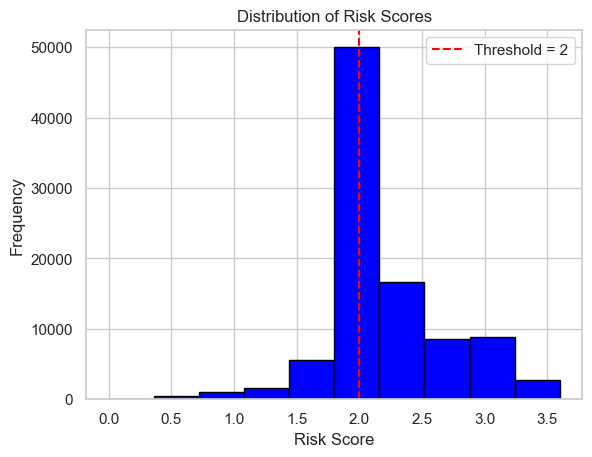

In [66]:
# Analyze the distribution of risk scores
from scripts.visualize import plot_risk_scores
plot_risk_scores(data)

threshold = 2 

In [67]:
# Classify users based on the risk score
data['RiskCategory'] = ['Good' if score > threshold else 'Bad' for score in data['RiskScore']]

# Display the classification results
print(data[['CustomerId', 'RiskScore', 'RiskCategory']].head())

        CustomerId  RiskScore RiskCategory
0  CustomerId_4406       2.10         Good
1  CustomerId_4406       2.10         Good
2  CustomerId_4683       1.60          Bad
3   CustomerId_988       2.50         Good
4   CustomerId_988       2.50         Good


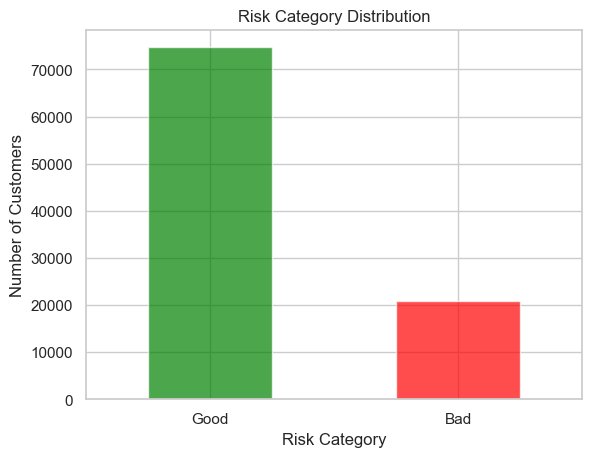

In [68]:
# Count the number of good and bad customers
from scripts.visualize import plot_risk_counts
risk_counts = data['RiskCategory'].value_counts()

plot_risk_counts(risk_counts)